# 1. Import  libraries

In [1]:
%matplotlib inline

import pandas as pd 
import os
import matplotlib.pyplot as plt 
from scipy.stats.stats import spearmanr
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np


# 2. Change the working directory

In [2]:
os.chdir('/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts/')
os.getcwd()

'/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts'

# 3. Read input file

## We performed the experiment twice so we will pool both datasets. 

In [3]:
#first experiment
#read the manual measurements of eggs after submersion in PBS 
b4_PBS_0 = pd.read_excel(r'../data/github/merged_egg_size_beforeafterPBS_17112022.xlsx', sheet_name= 'dry_Egg')

#read the manual measurements of eggs before being submerged in PBS 
after_PBS_0 = pd.read_excel(r'../data/github/merged_egg_size_beforeafterPBS_17112022.xlsx', sheet_name= 'PBS_Egg')

#merge the datasets based on the well_id
merged_0 = pd.merge(b4_PBS_0,after_PBS_0, how="inner", on= ['well_id']) 

#compute the difference
merged_0['diff'] = merged_0['Length_x'] - merged_0['Length_y'] 

#second experiment
#read the manual measurements of eggs after submersion in PBS 
b4_PBS = pd.read_csv(r'../data/github/merged_egg_size_beforePBS_29112022.csv')

#read the manual measurements of eggs before being submerged in PBS 
after_PBS = pd.read_csv(r'../data/github/merged_egg_size_afterPBS_29112022.csv')

#merge the datasets based on the well_id
merged_1 = pd.merge(b4_PBS,after_PBS, how="inner", on= ['well_id']) 
merged_1['diff'] = merged_1['Length_x'] - merged_1['Length_y'] 
merged_1.drop([25], inplace = True) #this measurement has a large difference due to some mistake so will be removed

#let's merge the two datasets and remove the double eggs
merged = pd.concat([merged_0,merged_1]) 


# 4. Data visualization
## We then fit a linear model to the data

In [6]:
x = np.array(merged['Length_x']).reshape((-1, 1))
x.shape
y = np.array(merged['Length_y'])
y.shape

model = LinearRegression(fit_intercept = False).fit(x, y)    
sl=model.coef_[0]
intc =  model.intercept_ 

## Plot the manual measurement of egg length before and after submersion in PBS

Text(450, 552, '$\\it{p}$-val < 0.001')

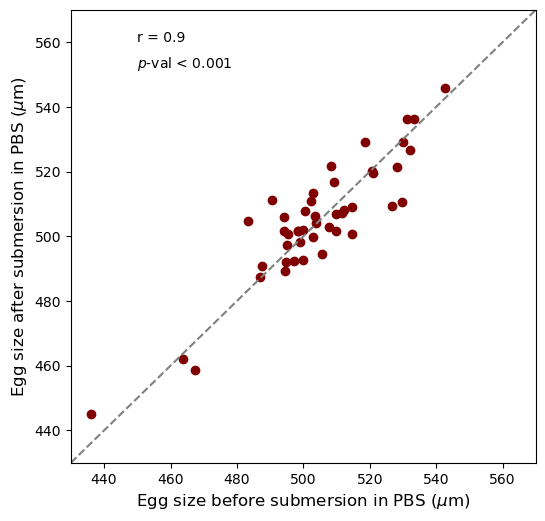

In [7]:
#plot the data
fig , ax = plt.subplots(sharex=True, sharey=True,figsize=(6,6),dpi=100, facecolor='w', edgecolor='k') 
plt.scatter(merged['Length_x'],merged['Length_y'],marker='o', color='maroon')
plt.xlim(430,570)
plt.ylim(430,570)
plt.axline((430,430), (550,550), color = 'gray', linestyle='--')
plt.xlabel('Egg size before submersion in PBS ($\mu$m)', fontsize=12) 
plt.ylabel('Egg size after submersion in PBS ($\mu$m)', fontsize=12) 
plt.annotate(r'r = %.1f'%(np.round(pearsonr(merged['Length_x'],merged['Length_y'])[0],2)), xy=(450,560),fontsize=10)
plt.annotate('$\it{p}$-val < 0.001', xy=(450,552),fontsize=10)
plt.savefig('../plots/final_plots/PBS_submersion_manual_measurement.png', dpi=100,format='png', bbox_inches = 'tight')
plt.savefig('../plots/final_plots/PBS_submersion_manual_measurement.svg', dpi=100,format='svg', bbox_inches = 'tight')

